In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from imblearn.over_sampling import SMOTE # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.feature_selection import SelectKBest, f_classif # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay # type: ignore

In [2]:
ds = pd.read_csv('creditcard.csv')

In [3]:
ds.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
ds.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
ds.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
ds.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
ds.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# distribution of legit transactions & fraudulent transactions
ds['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [10]:
# Data Cleaning: Removing missing values
data = ds.dropna()

In [11]:
# Data Formatting: Ensuring column names are consistent
data.columns = data.columns.str.strip().str.lower()

## Train Test and Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = ds.drop('Class',axis=1)
y = ds['Class']
print(X)
print(y)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.25141

In [14]:

# Define SMOTE model
smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 means equal fraud and non-fraud cases

# Apply SMOTE to generate synthetic fraud transactions
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())


Class
0    284315
1    284315
Name: count, dtype: int64


In [15]:
# Feature Selection: Selecting top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X_resampled, y_resampled)

In [16]:
# Feature Scaling: Standardizing numerical values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [17]:
# separating the data for analysis
legit = ds[ds.Class == 0]
fraud = ds[ds.Class == 1]
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [18]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [19]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
# compare the values for both transactions
ds.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Concatenating two DataFrames

In [22]:
new_dataset = pd.concat([X_resampled, y_resampled], axis=1)

In [23]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,144838.659385,-6.379157,1.672637,-5.885670,2.068340,-0.668576,-3.336450,-4.995823,2.632847,-2.275158,...,0.641337,-0.249308,-2.311290,-0.159402,1.190079,-0.258067,0.777265,-0.728919,7.334751,1
568626,65965.011763,-2.479028,0.958932,-1.782249,1.541783,-1.191990,-0.466794,-1.957161,0.312580,-0.433956,...,0.351983,0.208869,-0.235986,-0.404446,0.220454,0.685263,-0.890346,0.598736,74.507571,1
568627,34592.129093,-1.799894,2.368957,-2.673997,1.705968,-1.355923,-1.121788,-2.057832,-1.677459,-0.659287,...,1.473371,-0.581778,-0.013899,-0.144597,0.120315,0.242272,-0.121166,-0.534238,102.486823,1
568628,129683.002907,0.255234,2.432041,-5.388252,3.793925,-0.230814,-1.382725,-1.572929,0.748305,-1.600633,...,0.316760,-0.036858,0.182968,0.190701,-0.339250,-0.272824,0.315507,-0.091005,58.346854,1
568629,91471.277869,-4.453646,3.210469,-5.294410,1.449911,-1.264653,-0.493626,-3.130644,-4.165957,0.998760,...,4.414468,-1.065864,0.798149,0.299668,0.064660,-0.446730,-0.363233,1.018147,143.872749,1


In [25]:
new_dataset['Class'].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [26]:
# Statistical summary of the 'Class' attribute in the new dataset
new_legit=new_dataset[new_dataset['Class']==0]
new_fraud=new_dataset[new_dataset['Class']==1]

In [27]:
print(new_legit.shape)
print(new_fraud.shape)

(284315, 31)
(284315, 31)


In [28]:
new_legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [29]:
new_fraud.Amount.describe()

count    284315.000000
mean        102.758204
std         185.614217
min           0.000000
25%           1.413730
50%          30.800622
75%         105.086139
max        2125.870000
Name: Amount, dtype: float64

graph for balancing data

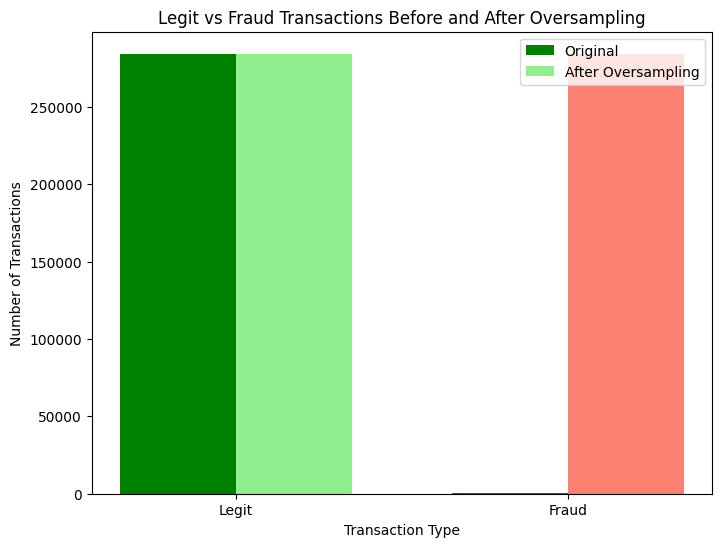

In [30]:

# Counts before oversampling
original_legit_count = legit.shape[0]
original_fraud_count = fraud.shape[0]

# Counts after oversampling
new_legit_count = new_legit.shape[0]
new_fraud_count = new_fraud.shape[0]

# Plotting
labels = ['Legit', 'Fraud']
original_counts = [original_legit_count, original_fraud_count]
new_counts = [new_legit_count, new_fraud_count]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of bars

plt.figure(figsize=(8, 6))
# Bars for original data
plt.bar(x - width/2, original_counts, width, label='Original', color=['green', 'red'])
# Bars for oversampled data
plt.bar(x + width/2, new_counts, width, label='After Oversampling', color=['lightgreen', 'salmon'])

# Labels and formatting
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Legit vs Fraud Transactions Before and After Oversampling')
plt.xticks(x, labels)
plt.legend()

plt.show()


In [31]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80799.667181,-4.955194,3.837974,-7.297426,4.662804,-3.255770,-1.431798,-5.863936,0.531557,-2.665336,...,0.370631,0.800526,-0.019303,-0.005738,-0.110391,0.052246,0.055737,0.162809,0.083221,102.758204


Splitting the data into Features & Targets

In [32]:
# Splitting features and target correctly
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [33]:
print(X)

                 Time        V1        V2        V3        V4        V5  \
0            0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321   
1            0.000000  1.191857  0.266151  0.166480  0.448154  0.060018   
2            1.000000 -1.358354 -1.340163  1.773209  0.379780 -0.503198   
3            1.000000 -0.966272 -0.185226  1.792993 -0.863291 -0.010309   
4            2.000000 -1.158233  0.877737  1.548718  0.403034 -0.407193   
...               ...       ...       ...       ...       ...       ...   
568625  144838.659385 -6.379157  1.672637 -5.885670  2.068340 -0.668576   
568626   65965.011763 -2.479028  0.958932 -1.782249  1.541783 -1.191990   
568627   34592.129093 -1.799894  2.368957 -2.673997  1.705968 -1.355923   
568628  129683.002907  0.255234  2.432041 -5.388252  3.793925 -0.230814   
568629   91471.277869 -4.453646  3.210469 -5.294410  1.449911 -1.264653   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.2395

In [34]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 568630, dtype: int64


In [35]:
# Now splitting into training & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(568630, 30) (454904, 30) (113726, 30)


Model Training

## Decision Tress

In [37]:
from sklearn.tree import DecisionTreeClassifier # type: ignore

In [38]:
dtree = DecisionTreeClassifier(
    max_depth=2,            # Super shallow tree (stumps)
    min_samples_split=700,  # Needs a huge number of samples to split
    min_samples_leaf=400,   # Each leaf must have 100 samples
    max_features='sqrt',    # Random subset of features at each split
    random_state=42
)

In [39]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, max_features='sqrt', min_samples_leaf=400,
                       min_samples_split=700, random_state=42)

## Prediction and Evaluation

In [40]:
# accuracy on training data
X_train_prediction = dtree.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
training_data_precision = precision_score(Y_train,X_train_prediction)
training_data_recall = recall_score(Y_train,X_train_prediction)
training_data_f1 = f1_score(Y_train,X_train_prediction)

In [41]:
# accuracy on test data
X_test_prediction = dtree.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
test_data_precision = precision_score(Y_test,X_test_prediction)
test_data_recall = recall_score(Y_test,X_test_prediction)
test_data_f1 = f1_score(Y_test,X_test_prediction)

In [42]:
predictions = dtree.predict(X_test)

In [43]:
predictions

array([1, 1, 0, ..., 1, 0, 1], shape=(113726,))

In [44]:
from sklearn.metrics import classification_report,confusion_matrix # type: ignore

In [45]:
print(classification_report(Y_test,predictions))


              precision    recall  f1-score   support

           0       0.83      0.96      0.89     56863
           1       0.96      0.80      0.87     56863

    accuracy                           0.88    113726
   macro avg       0.89      0.88      0.88    113726
weighted avg       0.89      0.88      0.88    113726



Confusion Matrix:
[[54860  2003]
 [11531 45332]]

True Positives (TP): 45332
True Negatives (TN): 54860
False Positives (FP): 2003
False Negatives (FN): 11531
Model Accuracy: 88.10%


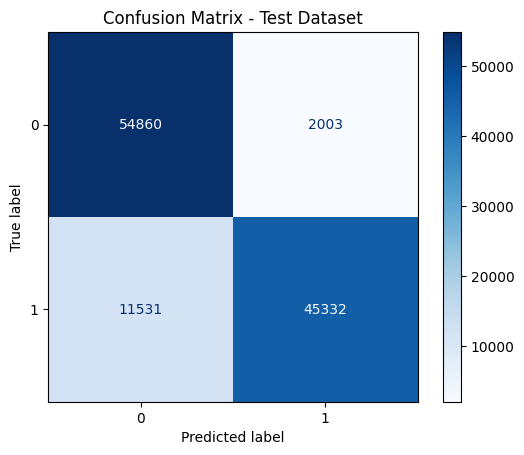

In [46]:


# Predict on test data
y_pred = dtree.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Extract TN, FP, FN, TP from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Print the confusion matrix values
print("Confusion Matrix:")
print(cm)
print(f"\nTrue Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
# Calculate and print accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Model Accuracy: {accuracy:.2%}")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix - Test Dataset")
plt.show()


In [47]:
print(f'Accuracy score on Training Data : {training_data_accuracy:.2%}')
print(f'Precision score on Training data : {training_data_precision:.2%}')
print(f'Recall score on Training data : {training_data_recall:.2%}')
print(f'f1 score on Training data : {training_data_f1:.2%}')

Accuracy score on Training Data : 88.11%
Precision score on Training data : 95.75%
Recall score on Training data : 79.76%
f1 score on Training data : 87.02%


In [48]:
print(f'Accuracy score on Test Data : {test_data_accuracy:.2%}')
print(f'Precision score on Test data : {test_data_precision:.2%}')
print(f'Recall score on Test data : {test_data_recall:.2%}')
print(f'f1 score on Test data : {test_data_f1:.2%}')

Accuracy score on Test Data : 88.10%
Precision score on Test data : 95.77%
Recall score on Test data : 79.72%
f1 score on Test data : 87.01%


ROC AUC Score: 0.8859


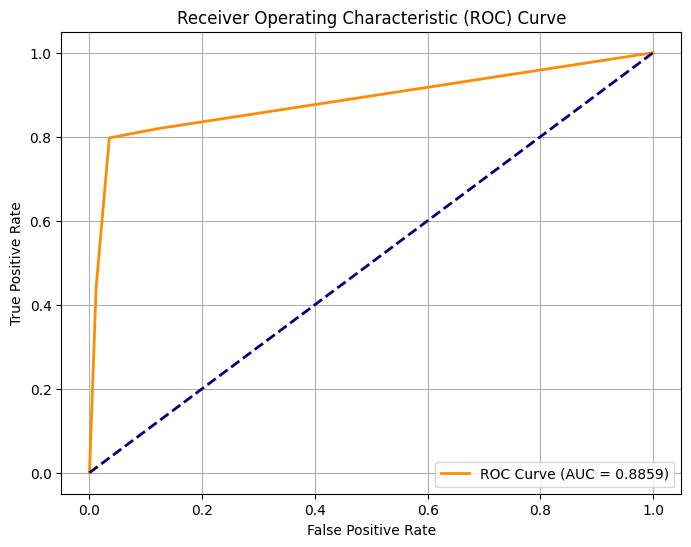

In [49]:
from sklearn.metrics import roc_auc_score, roc_curve # type: ignore
import matplotlib.pyplot as plt # type: ignore
y_proba = dtree.predict_proba(X_test)[:, 1] 
# Calculate ROC AUC Score
auc_score = roc_auc_score(Y_test, y_proba)
print(f"ROC AUC Score: {auc_score:.4f}")

# Compute ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


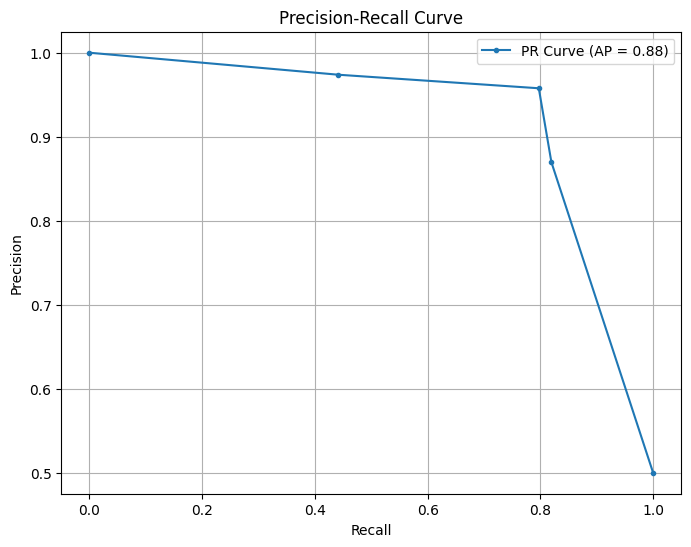

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score # type: ignore
import matplotlib.pyplot as plt # type: ignore

# Assuming you have these from earlier
# Y_test : true labels
# y_proba : predicted probabilities for the positive class

# Calculate precision-recall pairs
precision, recall, thresholds = precision_recall_curve(Y_test, y_proba)

# Calculate average precision score
average_precision = average_precision_score(Y_test, y_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

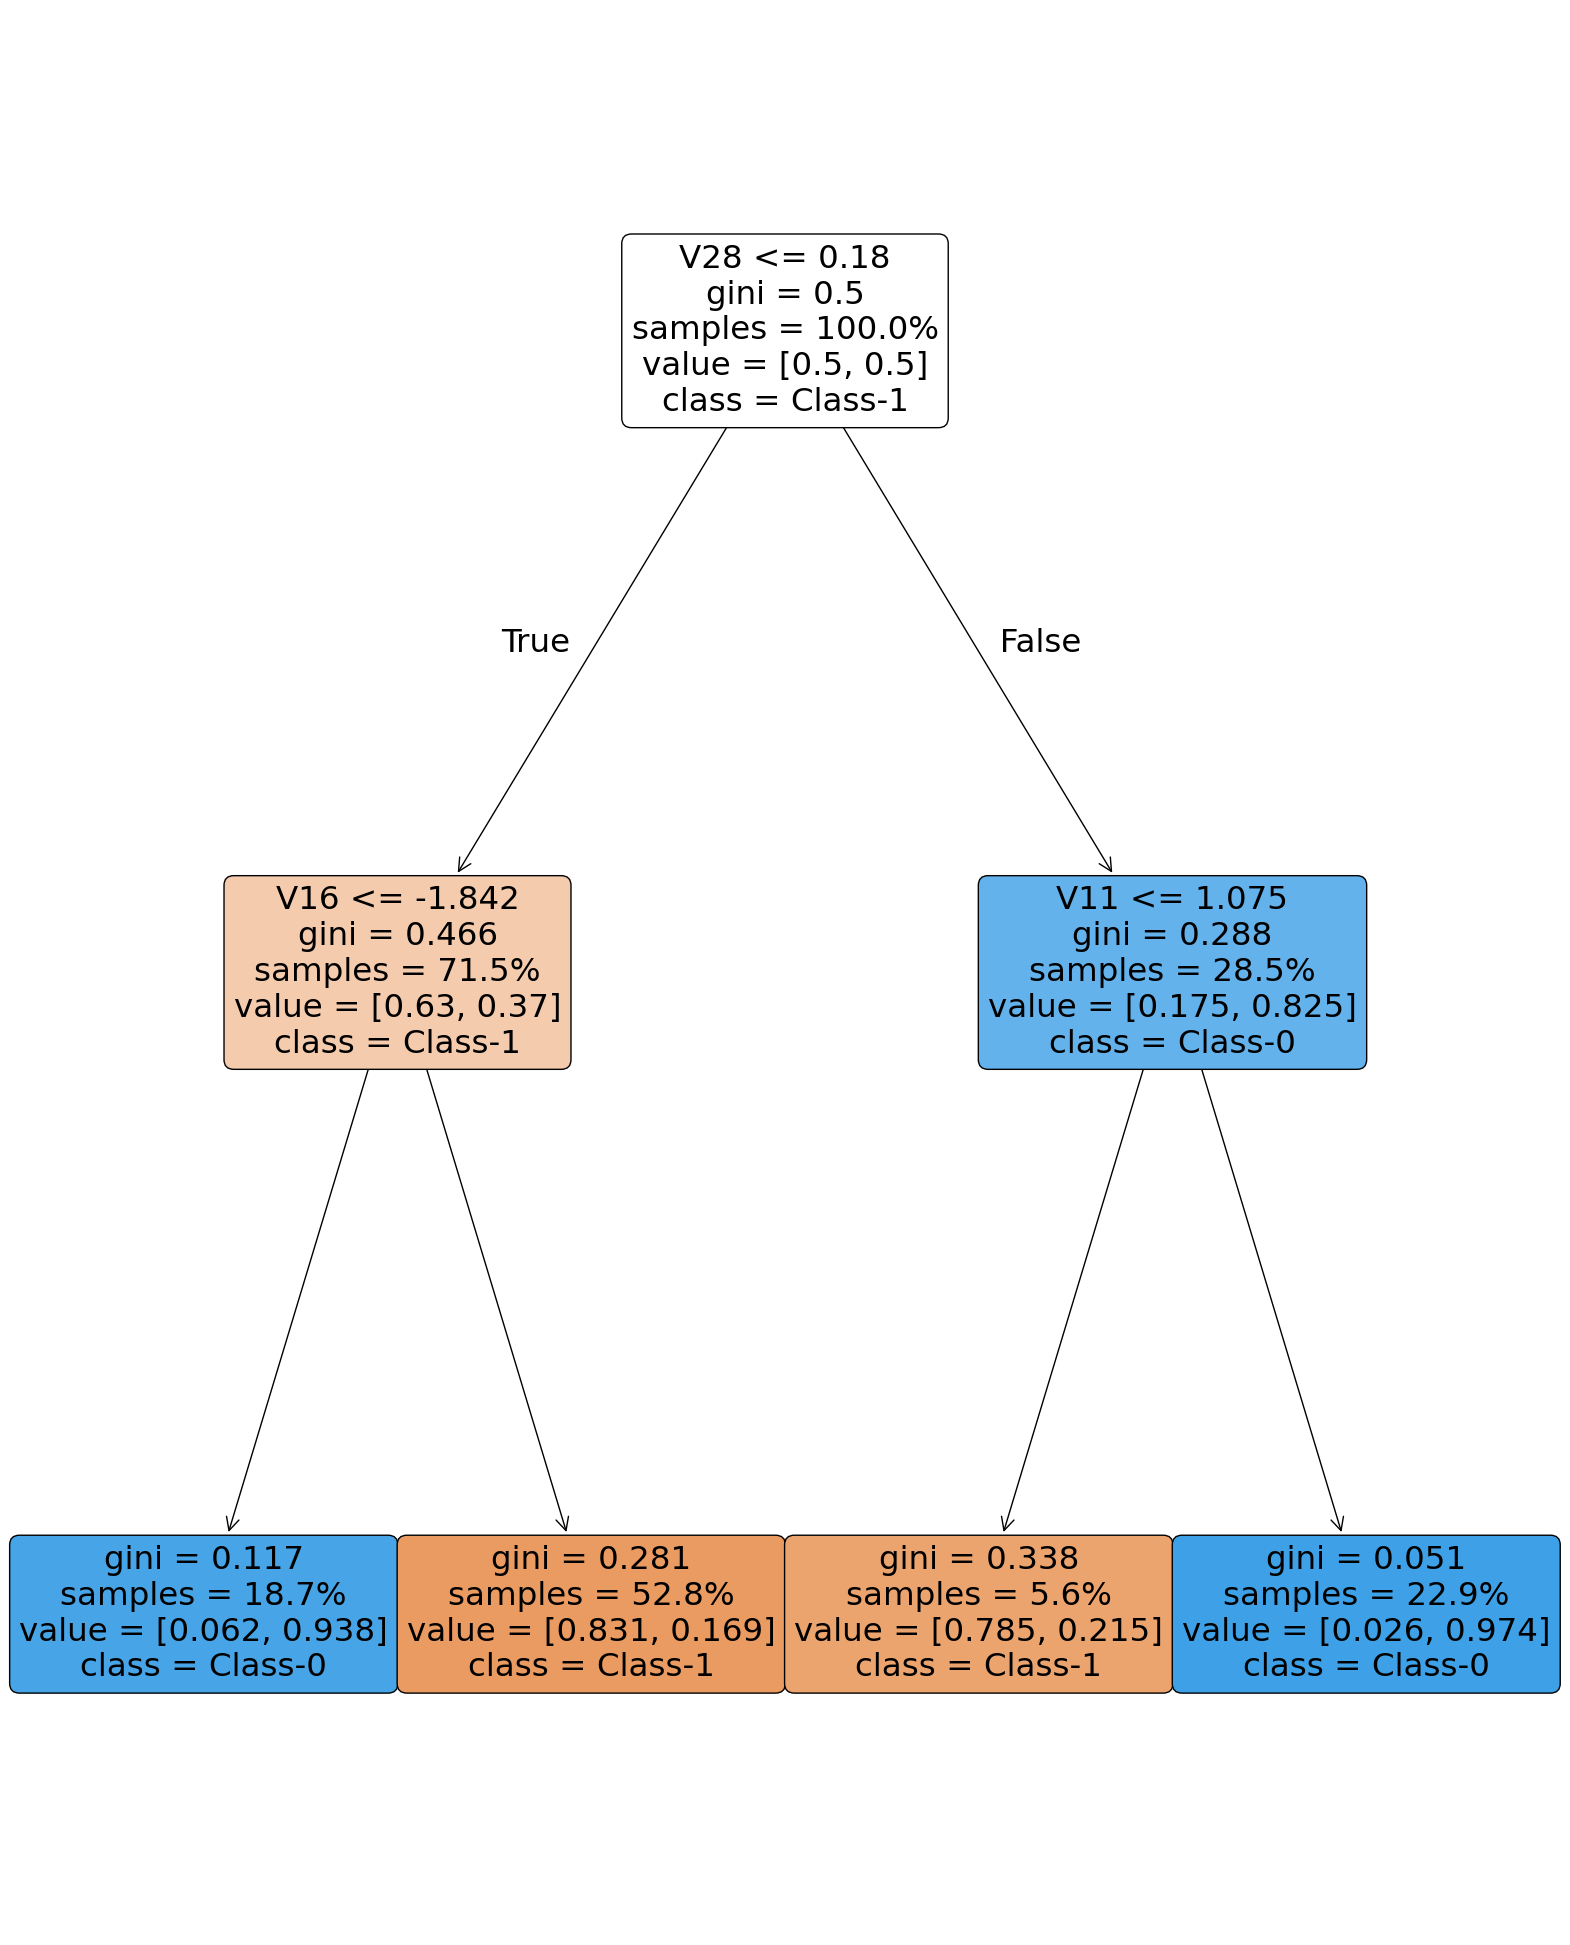

In [51]:
from sklearn import tree # type: ignore
plt.figure(figsize=(20,25))
tree.plot_tree(dtree,feature_names=X.columns,class_names=['Class-1', 'Class-0'],rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True
        )
plt.show()